In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Lendo o dataframe

In [7]:
def readDataframe(angles):
  # angles = [45,63,72]
  dfs = []
  for angle in angles:
    dfs.append( pd.read_excel('resultados_'+str(int(angle))+'g.xlsx', sheet_name=['dados_radial',"dados_wall", "dados_axis", "dados_wall_tail"]))
  return dfs

In [8]:
angles = [45,63,72]
dfs = readDataframe(angles)

# Plotando os perfis de velocidade axial e tangencial

In [251]:
def plotVel(df, distances, direction):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.scatter(df['dados_radial']['r_' + str(int(d)) + 'd'].div(R), df['dados_radial']['vel_' + direction  + '_' + str(int(d)) +'d'].div(Ub), label=str(int(d))+'D')
    
  plt.xlabel("r/R")
  if direction == 'tang':
    plt.ylabel("v/Ub")
  elif direction == 'axial':
    plt.ylabel("u/Ub")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

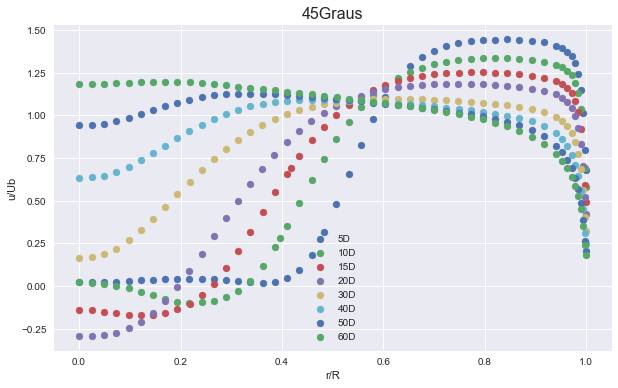

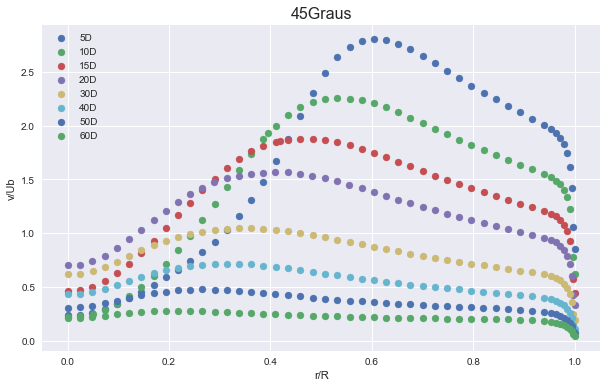

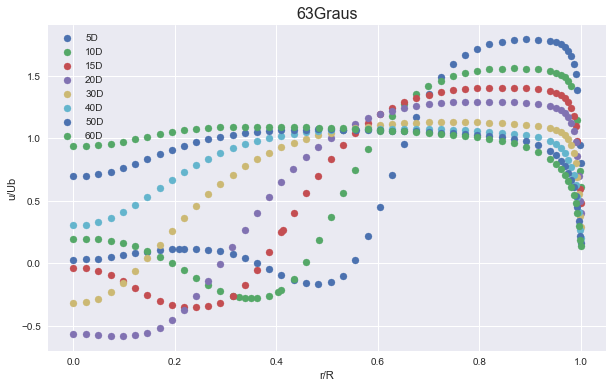

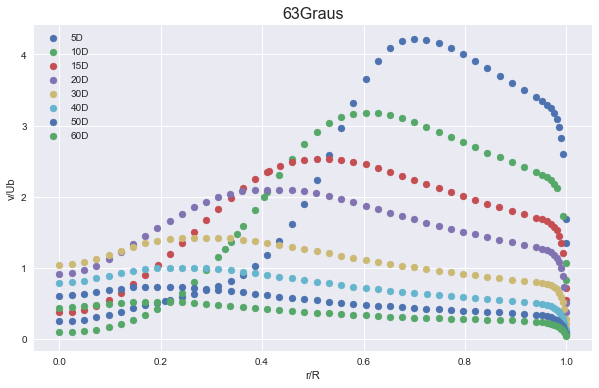

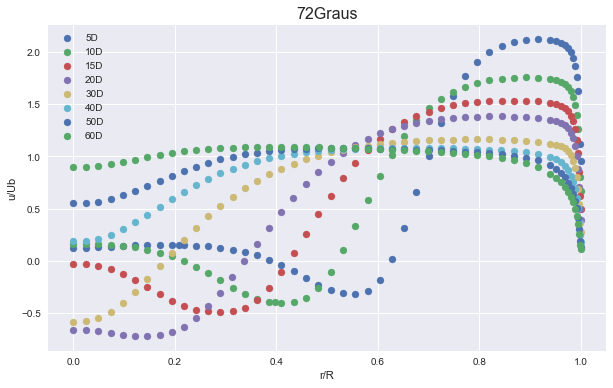

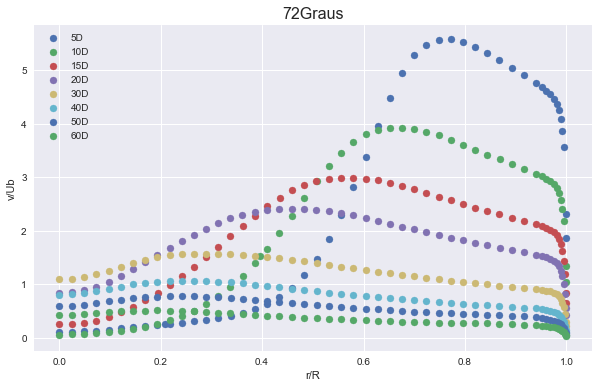

In [252]:
distances = [5,10,15,20,30,40,50,60]
R = 0.025
Ub = 1
for df,angle in zip(dfs, angles):
  plotVel(df, distances, 'axial')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  plt.savefig('graficos/vel_axial_' + str(angle) + 'g.png')
  plotVel(df, distances, 'tang')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  plt.savefig('graficos/vel_tang_' + str(angle) + 'g.png')

# Plotando número de giro 

In [173]:
def plotS(df, distances, angle):
  Sss = []
  for d in distances:
    Sss.append ( (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_' + str(int(d)) + 'd']*df['dados_radial']['r_'+ str(int(d)) +'d']*df['dados_radial']['vel_tang_'+ str(int(d)) +'d']*df['dados_radial']['r_'+ str(int(d)) +'d']), df['dados_radial']['r_'+ str(int(d)) +'d'])))/(np.pi*(R**3)*(Ub**2)))
  S_tot = Sss #S_5d,S_10d,S_15d,S_20d,S_30d,S_40d,S_50d,S_60d
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, S_tot,marker='o', label=angle)
  plt.xlabel("x/D")
  plt.ylabel("S")
  plt.grid(True)
  plt.legend(loc="best")
  plt.savefig('graficos/intensidade_giro.png')
  plt.show;

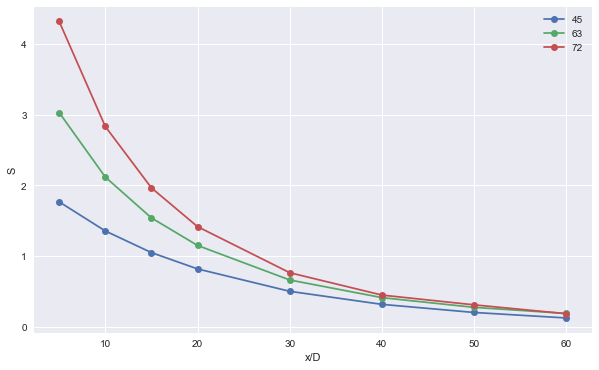

In [175]:
distances = [5,10,15,20,30,40,50,60]
R = 0.025
Ub = 1
plt.figure(figsize=(10, 6))
for df, angle in zip(dfs, angles):
  plotS(df, distances, angle)

## Plotando Velocidade tangencial máxima em cada x/D

In [253]:
def plotVeltangmax(df, distances, angle):
  vtm = []
  for d in distances:
   vtm.append (df['dados_radial']['vel_tang_' + str(int(d)) + 'd'].max())
  a = vtm
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, vtm,marker='o', label=angle)
  plt.xlabel("x/D")
  plt.ylabel("vmax")
  plt.grid(True)
  plt.legend(loc="best")
  plt.savefig('graficos/veltangmax_axis.png')
  plt.show;

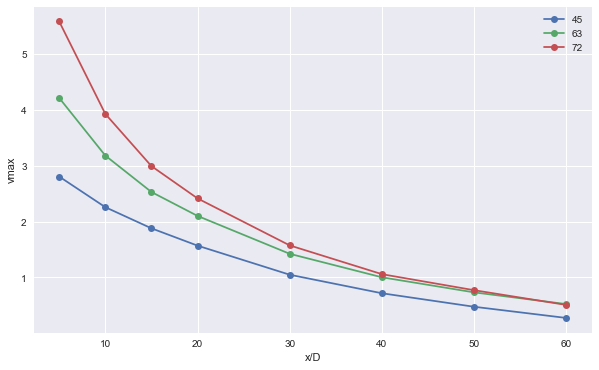

In [254]:
plt.figure(figsize=(10, 6))
for df, angle in zip(dfs, angles):
  plotVeltangmax(df, distances, angle)

## Plotando Velocidade axial mínima em cada x/D

In [255]:
def plotVelaxialmin(df, distances, angle):
  vtm = []
  for d in distances:
   vtm.append (df['dados_radial']['vel_axial_' + str(int(d)) + 'd'].min())
  a = vtm
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, vtm,marker='o', label=angle)
  plt.xlabel("x/D")
  plt.ylabel("umin")
  plt.grid(True)
  plt.legend(loc="best")
  plt.savefig('graficos/velaxialmin_axis.png')
  plt.show;

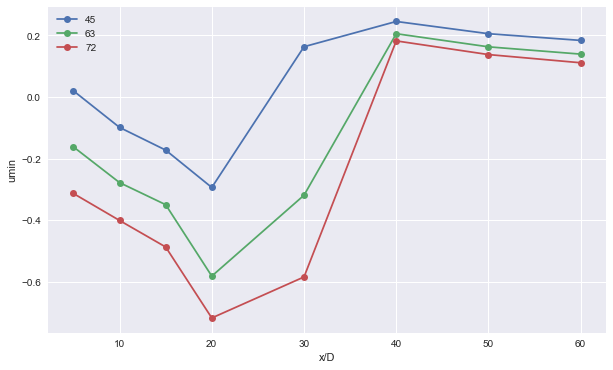

In [256]:
plt.figure(figsize=(10, 6))
for df, angle in zip(dfs, angles):
  plotVelaxialmin(df, distances, angle)

## Calculando o deslocamento da velocidade tangencial máxima no raio

In [259]:
def velmax(df, distances, direction):
  plt.figure(figsize=(10, 6))
  #vtm = []
  #r_vtm = []
  for d in distances:
   #vtm.append (df['dados_radial']['vel_'+direction+'_' + str(int(d)) + 'd'].max())
   #r_vtm.append (df['dados_radial']['r_'+str(int(d))+'d'][df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'] == df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'].max() ])

   #a = vtm
   #x = r_vtm
   plt.scatter((df['dados_radial']['r_'+str(int(d))+'d'][df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'] == df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'].max() ].div(R)), df['dados_radial']['vel_'+direction+'_' + str(int(d)) + 'd'].max(), label=str(int(d))+'D')

  plt.xlabel("r/R")
  if direction == 'tang':
    plt.ylabel("vmax")
  elif direction == 'axial':
    plt.ylabel("umax")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

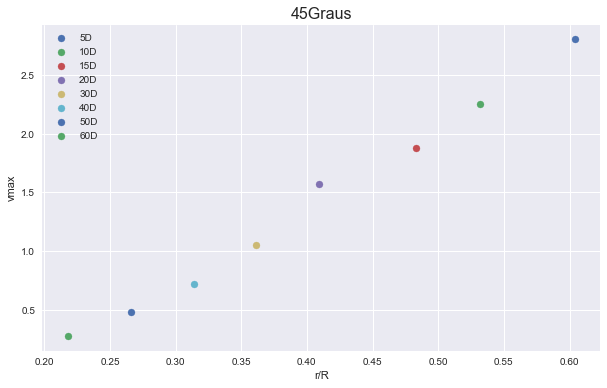

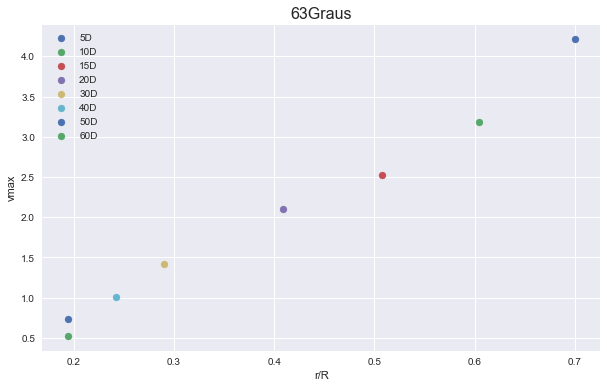

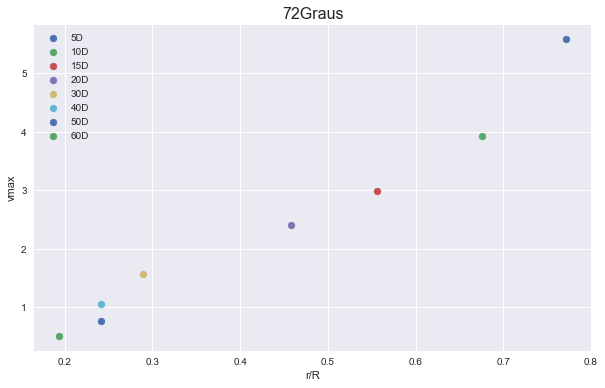

In [260]:
for df,angle in zip(dfs, angles):
  #velmax(df, distances, 'axial')
  #plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  #plt.savefig('graficos/vel_axial_' + str(angle) + 'g.png')
  velmax(df, distances, 'tang')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  #plt.savefig('graficos/vel_tang_' + str(angle) + 'g.png')

## Calculando a vorticidade axial

In [ ]:
#vel = df['dados_radial']['vel_tang_'+str(int(d))+'d'] 
#velmax = df['dados_radial']['vel_tang_'+str(int(d))+'d'].max()
#raio = df['dados_radial']['r_'+str(int(d))+'d']
#raio_max = raio[vel == velmax]
#w_x.shape

In [263]:
def vortaxial(df, distances):
  plt.figure(figsize=(10, 6))
  for d in distances:
        vel_tang = df['dados_radial']['vel_axial_'+str(int(d))+'d']
        r_d = df['dados_radial']['r_'+str(int(d))+'d']
        w_x=((1/r_d[1:])*np.diff(r_d*vel_tang))/(np.diff(r_d))
        plt.plot(r_d[1:].div(R),w_x,label=str(int(d))+'D')
        
  plt.xlabel("r/R")
  plt.ylabel("w x")
  plt.grid(True)
  plt.legend(loc="best")  
  plt.show;
        

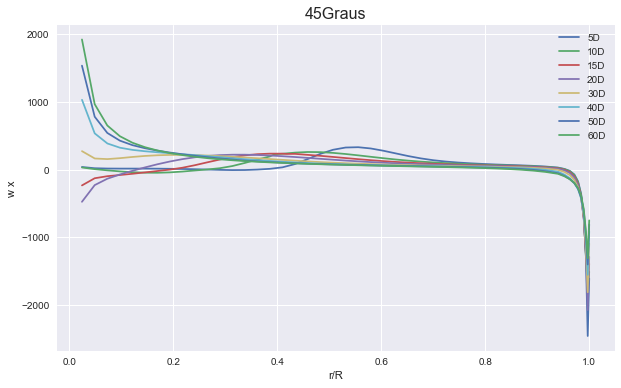

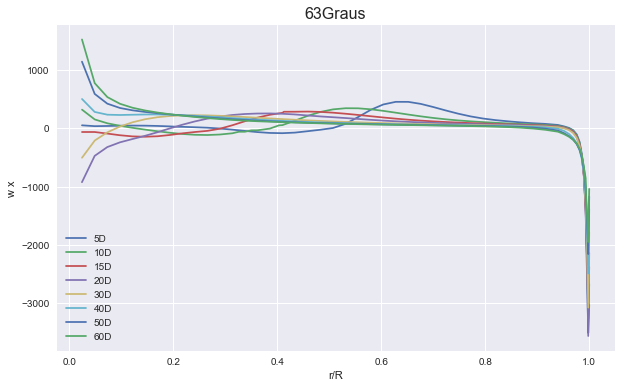

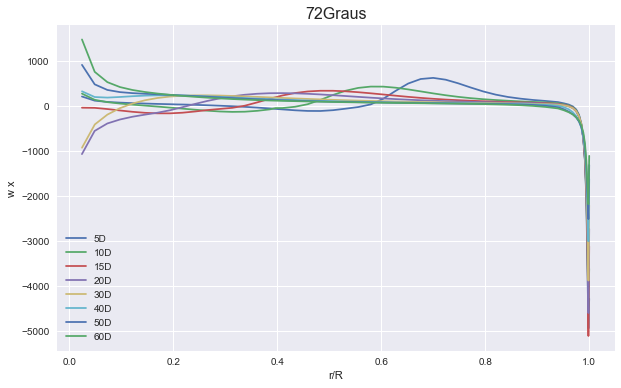

In [264]:
for df,angle in zip(dfs, angles):
  vortaxial(df, distances)
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})